In [ ]:
import numpy as np
import sympy as sp
import control as ct
import matplotlib.pyplot as plt

# 1. Introduction
A control system consists of interconnected components that deliver a desired response. It generates a signal representing the error between the desired and actual responses, allowing for closed-loop operations known as a feedback system. Feedback is crucial for improving control systems and is also inherent in natural systems, like the human heart rate control system.

![](pics/diag36.svg)

Examining a single-loop feedback system highlights the characteristics and benefits of feedback, establishing a foundation that can be applied to more complex multi-loop systems.

An open-loop system, or a system without feedback, is shown in the following figure:

![](pics/diag35.svg)

The disturbance, $T_{d}(s)$, directly influences the output, $Y(s)$. In the absence of feedback,
the control system is highly sensitive to disturbances and to both knowledge of and
variations in parameters of $P(s)$.
If the open-loop system does not provide a satisfactory response, then a suitable cascade controller, $C(s)$, can be inserted preceding the process, $P(s)$, as shown in
figure below:

![](pics/diag37.svg)

Then it is necessary to design the cascade transfer function, $C(s)P(s)$, so that the resulting transfer function provides the desired transient response. This is known as open-loop control.

> **An open loop control system operates without feedback and directly generates the output in response to an input signal**
 
By contrast, a closed-loop negative feedback control system is shown below:

![](pics/diag39.svg) ![](pics/diag38.svg)

>**A closed-loop system uses a measurement of the output signal and a ­comparison with the desired output to generate an error signal that is used by the controller to adjust the actuator.**

Despite the cost and increased system complexity, closed-loop feedback control has the following advantages:
+ Decreased sensitivity of the system to variations in the parameters of the process.
+ Improved rejection of the disturbances.
+ Improved measurement noise attenuation.
+ Improved reduction of the steady-state error of the system.
+ Easy control and adjustment of the transient response of the system.

Let’s explore how applying feedback can lead to the benefits mentioned above. By considering a tracking error signal, it becomes clear that we can use feedback with a controller in the loop to enhance system performance.

# 2. Error signal analysis
## 2.1 Tracking error signal 
The closed-loop feedback control system introduced previously has three inputs -$R(s)$, $T_d(s)$ and $N(s)$- and one output $Y(s)$. The signals $T_{d}(s)\text{ and }N(s)$ are disturbance and measurement noise signals, respectively. Define the **tracking error** as:
$$
E(s)=R(s)-Y(s)
$$
With $H(s)=1$ to simplify the analysis. 

The transfer function of the whole closed-loop system is given by:
$$
Y(s) = \frac{P(s)C(s)}{1+P(s)C(s)}R(s)+\frac{P(s)}{1+P(s)C(s)}T_d(s)- \frac{P(s)C(s)}{1+P(s)C(s)}N(s)
$$
Therefor, with $E(S)=R(s)-Y(s)$ we obtain:
$$
E(s) = \frac{1}{1+P(s)C(s)}R(s)-\frac{P(s)}{1+P(s)C(s)}T_d(s)+ \frac{P(s)C(s)}{1+P(s)C(s)}N(s)
$$
By taking $L(s)=P(s)C(s)$ as the loop gain, we can now express the tracking error as below:
$$
E(s) = \frac{1}{1+L(s)}R(s) -\frac{P(s)}{1+L(s)}T_{d}(s)+\frac{L(s)}{1+L(s)}N(s) 
$$
Now we are able to define the sensitivity gain:
$$
S(s) = \frac{1}{1+L(s)}
$$
And also the complementary sensitivity gain as follow:
$$
C_{S}(s) = \frac{L(s)}{1+L(s)}
$$
It's obvious to note that $S(s) + C_{S}(s) = 1$.

The final expression of the tracking error becomes:
$$
E(s) = S(s)R(s) - S(s)P(s)T_{d}(s) + C_{S}(s)N(s)
$$

$\large{\textcolor{darkorange}{\text{Clearly, we cannot simultaneously make }S(s) \text{ and } C_{S}(s) \text{ small, hence design compromises must be made}}}$

## 2.2 Analyse of the tracking error signal 
Let's consider again the tracking error expression:
$$
E(s) = \frac{1}{1+L(s)}R(s) -\frac{P(s)}{1+L(s)}T_{d}(s)+\frac{L(s)}{1+L(s)}N(s) 
$$
It is evident that for a given plant $P(s)$, to reduce the impact of $T_{d}(s)$ on the tracking error $E(s)$ we desire $L(s)$ to be "Large" over the range of disturbance frequencies. In other words, $\frac{P(s)}{1+L(s)}\searrow 0$. To achieve this objective we are led to design the controller $C(s)$ to have a large magnitude over an important range of frequencies.

Conversely, to attenuate the noise effect on the tracking error signal, we need $L(s)$ to be small over all the noise signal frequencies which implies deigning the controller with a small magnitude over the noise range of frequencies. 

`Clearly this leads to an apparent conflict between the disturbance rejection and noise attenuation requirements.` 

We can solve this by noticing the fact that disturbance signal are commonly a ***low frequency signal*** contrariwise the noise signal is a ***high frequency signal*** so we can design the controller to take into account this specificities. 

# 3. Sensitivity of control system to parameter variations
A process represented by the transfer function $P(s)$ is affected by factors such as environmental changes, aging, and uncertainties in process parameters. In an open-loop system, these variations lead to inaccurate outputs. However, a closed-loop system can detect changes in the output and make corrections. The sensitivity of a control system to parameter variations is crucial, and a ***major advantage of closed-loop feedback control is its ability to reduce this sensitivity***.

For a closed-loop system if $L(s)\gg 1$ for all $\omega$ of interest we can then assure that:
$$
Y(s)\cong R(s)
$$
In other words, increasing the loop gain magnitude canceled the effect of the plant on the output as long as we maintain stability.
Let's consider a closed-loop system with zero noise and disturbance signals ($T_{d}(s)=N(s)=0$) but with some amount of parameters variation. Then:
$$
E(S)+\Delta E(s) = \frac{R(s)}{1 + P(s)C(s)+\Delta P(s)C(s)}
$$
After some development we can establish the expression of the tracking error variation du to system parameter variation w.r.t the reference signal $R(s)$:
$$
\Delta E(s) = -\frac{C(s)\Delta P(s)}{(1+L(s)+\Delta P(s)C(s))(1+L(s))}R(s)
$$
If we take $L(s)\gg C(s)\Delta P(s)$ then:
$$
\Delta E(s)\approx -\frac{C(s)\Delta P(s)}{(1+L(s))²}R(S)=-E(s)\frac{\Delta P(s)}{P(s)}%\Rightarrow \frac{\Delta E(s)}{E(s)}\approx -{\Delta P (s)\over P(s)} 
$$
Larger magnitude of $L(s)$ translates into smaller changes in the tracking error (that is,
reduced sensitivity to changes in $∆P(s)$ in the process). Also, larger $L(s)$ implies
smaller sensitivity, $S(s)$.

+ **System sensitivity definition:**
  The system sensitivity is defined as the ration of the percentage change in the transfer function to the percentage of the plant transfer function.
$$
\large{S = {\frac{\Delta H_{cl}(s)}{H_{cl}(s)}\over{\Delta P(s)\over P(s)}}}
$$
where $H_{cl}(s)={Y(s)\over R(s)}$. For small variation we reach the limit and the sensitivity becomes:
$$
S = {{\partial H_{cl} \over H_{cl}}\over{\partial P \over P}} = {\partial \ln H_{cl} \over \partial \ln P} = {1\over 1 + L}
$$
  >**System sensitivity is the ratio of change in the system transfer function to the change of the plant transfer function (or parameter) for a small incremental change.**

A key advantage of feedback control systems is their ability to reduce the impact of parameter variations by using a feedback loop. While highly accurate open-loop systems require careful selection of components $P(s)$, closed-loop systems can tolerate less precision because the sensitivity to changes in $P(s)$ is diminished by the loop gain $L(s)$. This feature provides a significant benefit, which can be illustrated with a simple example.

***Example: feedback amplifier***
Let consider the feedback amplifier illustrated below:

![](pics/diag40.svg)

The closed-loop transfer function for this system is given by:
$$
H_{cl}(S) = -\frac{K_{a}}{1+\beta K_{a}},\quad \beta=R_{2}/R_{p}
$$
The feedback amplifier can be represented with the following signal flow graph:

![](pics/diag41.svg)

Then the system sensibility is given by:
$$
S(s) =S^{H_{cl}}_{P}\times S^{P}_{K_{a}} = \frac{1}{1+\beta K_{a}},\quad P(s) = -K_{a}
$$
If $K_{a}$ is large ($K_{a}=10^{4}, \beta=0.1$) then $S(s)\approx 10^{-3}$ which is very low.

# 4. Disturbance signals in feedback control system
Many control systems are subject to extraneous disturbance signals that cause the system to provide an inaccurate output. Electronic amplifiers have inherent noise generated within the integrated circuits or transistors; radar antennas are subjected to wind gusts; and many systems generate unwanted distortion signals due to non-linear elements. An important effect of feedback in a control system is the reduction of the effect of disturbance signals. A **disturbance signal** is an unwanted input signal that affects the output signal. The benefit of feedback systems is that the effect of distortion, noise, and unwanted disturbances can be effectively reduced.

## 4.1 Disturbance rejection

When $R(s)=N(s)=0$, the tracking error signal takes the following expression:
$$
E(S) = -\frac{P(s)}{1+L(s)}T_d(s)
$$
For a fixed $P(s)$ and a given disturbance signal $T_d(s)$, as the loop gain $L(s)$ increases, the effect of $T_d(S)$ on the tracking error decreases. We have already shown that the system sensitivity is small for large loop gain. We conclude that large loop gain leads to a good disturbance rejection.
In practice disturbance signals are low frequency signals, then we must assure that the loop gain be larger only for these specific range of low frequencies. This is equivalent to stating that we want to design the controller $C(s)$ so that the sensitivity function $S(s)$ is small at low frequencies.

***Example: speed control system for a steel rolling mill***

![](pics/diag42.svg)

The transfer function model of an armature-controlled DC motor with a load torque disturbance is shown by the following block diagram:

![](pics/diag43.svg)

If we consider $V_{a}(s)=0$, then the tracking error for this open-loop will be:
$$
E(S) =-\omega(s) = {1\over Js + b + {K_{m}K_{b}\over R_{a}}}T_{d}(S)
$$
Let's apply the final value theorem to evaluate the steady-state error in speed due to the load torque disturbance $T_{d}(s)={D\over s}$:
$$
\lim\limits_{t\rightarrow+\infty}e(t) = \lim\limits_{s\rightarrow0}sE(s)=\frac{D}{b+{K_{m}K_{b}\over R_{a}}}=-\omega_{ol}(\infty)
$$
Let's now consider the closed-loop feedback system version of the armature-controlled DC motor given by the following block diagram:

![](pics/diag44.svg)

The signal flow diagram can be deduced from the previous block diagram as below:

![](pics/diag45.svg)

Where $C(s)=\frac{K_{m}K_{a}}{R_{a}}$, $P(s)={1\over Js + b}$ and $H(s)=K_{t}+\frac{K_{b}}{K_{a}}$

 The relation between the disturbance and the angular velocity is given by:
 $$
 \omega_{cl}(s)=-{1\over Js + b + \frac{K_{m}}{R_{a}}(K_{t}K_{a}+K_b)}T_{d}(s)
$$
The steady-state output is given by the final-value theorem:
$$
\omega_{cl}(\infty) = \lim\limits_{s\rightarrow0}s\omega(s)=-{D\over b + \frac{K_{m}}{R_{a}}(K_{t}K_{a}+K_{b})} 
$$
Where $T_{d}(s)=\frac{D}{s}$.

The ratio between the open-loop and the closed-loop for the angular velocity is given by:

$$
\frac{\omega_{cl}(\infty)}{\omega_{ol}(\infty)}=\left({\frac{D}{b+{K_{m}K_{b}\over R_{a}}}\over{D\over b + \frac{K_{m}}{R_{a}}(K_{t}K_{a}+K_{b})}}\right)^{-1}\approx {R_{a}b + K_{m} K_{b}\over K_{m}K_{t}K_{a}}
$$
This ratio is less than $0.02$.

## 4.2 Measurement noise attenuation
when $R(S)=T_d(s)=0$, it follows:
$$
E(s) = \frac{L(s)}{1+L(s)}N(s)=\underbrace{C_{S}(s)}_{\text{Complementary sensitivity}}N(s)
$$
As the loop gain  $L(s)$ decreases, the tracking error experiences the same pattern for a given noise signal. Therefor, we need a small loop gain over the frequencies associated with the expected noise signal.
In practice, measurement noise signal are often high frequency. Thus we want the loop gain to be small at high frequencies. The separation of disturbances (low-frequency signal) and measurement noise (high-frequency signal) is very fortunate because it gives the system control designer a way to approach the design process. A noise signal that is prevalent in many systems is the noise generated by measurement sensor. It's related to the output of the system by the given formula assuming $(R(S)=T_{d}(s)=0)$:
$$
Y(S) = -{L(s)\over 1+L(s)} N(s)\approx N(s) 
$$
for Large loop gain.

>`Keeping in mind the relationship` $S(s) + C_{S}(s) = 1$ `the trade-off in the design process is inevitable.`

# 5. Control of the transient response
One of the most characteristics of a control system is their transient response. **The transient response** is the response of the system over time before reaching the steady-state response. 
The purpose of the control system is to provide a desired response. It follow the transient response often must be adjusted until it is satisfactory. To highlight the importance of the transient response let's analyse their effect  on a speed control system. The is described by the following transfer function:
$$
P(s) = {K_{1}\over \tau_{1}s + 1}
$$ 
Where $K_{1}= {K_{m}\over R_{a}b + K_{b}K_{m}}$ and $\tau_{1} = {R_{a}J\over R_{a}b+K_{b}K_{m}}$. 

![](pics/diag46.svg)

The open-loop speed control system is represented by the following block diagram:

![](pics/diag47.svg)

$$
\omega(s) = {K_{a}K_{1}\over \tau_{1}s + 1} \frac{k_{2}E}{s}
$$
By taking inverse Laplace transform we obtain the time response of the system:
$$
\omega(t) = K_{a}K_{1}k_{2}E (1-\exp(\frac{-t}{\tau_{1}}))
$$
The closed-loop speed control system is given by the following block diagram:

![](pics/diag48.svg)

$$
\omega(s) = \frac{K_{a}K_{1}}{\tau_{1}s + 1 + K_{t}K_{a}K_{1}} {k_{2}E\over s}
$$
The inverse Laplace transform gives the speed over time for this system:
$$
\omega(t) = \frac{K_{a}K_{1}}{1 + K_{t}K_{a}K_{1}}k_{2}E (1-\exp(-(1+K_{t}K_{a}K_{1})t/\tau_1))
$$
+ **Simulation**

In [ ]:
# run-python
tau = 10
tt = np.linspace(0.0,2.0,1024)
k1kakt = 100
wt = 1 - np.exp(-tt/tau)
wclt = 1-np.exp(-tt*(1+k1kakt)/tau)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tt,wt,label=r"$\frac{\omega(t)}{K_{1}k_{2}E}$")
ax.plot(tt,wclt,label=r"$\frac{K_{t}\omega_{cl}(t)}{k_{2}E}$")
ax.set_xlabel("Times [s]")
ax.set_ylabel("Output")
ax.grid(True)
ax.legend(loc='best')
ax.set_title('Speed control system response under open and closed-loop')
plt.show()

While we are considering this speed control system, it will be worthwhile to determine the sensitivity of the open- and closed-loop systems. As before, the sensitivity of the open-loop system to a variation in the motor constant or the potentiometer constant $k_2$ is unity. The sensitivity of the closed-loop system to a variation in $K_{m}$ is frequency dependent as is reflected in the following expression:
$$
S^{H_{cl}}_{K_{m}} \approx \frac{s + {1\over \tau_{1}}}{s + {1 + K_{t}K_{a}K_{1}\over\tau_{1}}} 
$$
+ **Simulation**

In [ ]:
# run-python
kaktk1=100
tau=10
S = ct.tf([1,1/tau],[1,(1+kaktk1)/tau])
ct.bode_plot(S,plot_magnitude=True, plot_phase=False, title="Sensitivity")
plt.show()

# 6. steady-state error 
A feedback control system allows engineers to adjust the transient response effectively. Additionally, as we have observed, the system's sensitivity and the impact of disturbances can be significantly reduced. However, we also need to examine and compare the final steady-state error in both open-loop and closed-loop systems. 
The **steady-state error** refers to the difference remaining after the transient response has dissipated, leaving only the continuous response.

The error of the open-loop control system shown in the figure below is:

![](pics/diag37.svg)

$$
E_{ol}(s) = R(s) - Y(s) = (1 -P(s)C(s))R(s)
$$ 
When $T_d(s)=0$. If we consider the closed-loop version of this system with $H(s)=1 \text{ and } N(s)=0$, the error becomes:
$$
E_{cl}(s) = \frac{1}{1 + P(s)C(s)} R(s)
$$
To calculate the steady-state error we can use the final value theorem as follow:
$$
\lim\limits_{t\rightarrow\infty}e(t) = \lim\limits_{s\rightarrow0}sE(s)
$$
Therefor, using a step unit as a reference signal we obtain the steady-state error for the open- and the closed-loop system:
$$
e_{ol}(\infty) = \lim\limits_{s\rightarrow0}\;1-P(s)C(s)=1-P(0)C(0)
$$
and for the closed-loop case:
$$
e_{cl}(\infty)= \frac{1}{1+P(0)C(0)}
$$
The value $P(0)\text{ and/or } C(0)$ are called the DC gain which is normally greater than $1$. Then the DC loop gain will also be greater than $1$. This leads to the fact that the steady-error for the open-loop system is always much important that the steady-error of the closed loop unless we design the controller in a way that compensate the plant's DC gain. In this case we obtain $e_{ol}(\infty)=0 \text{ for } P(0)C(0)=1$. 
Therefor, a logical question can be rosed, what is the advantage of the closed-loop system in this specific case?
To address this question let's took this example:

***Example***
Consider a unity feedback system with plant and control transfer functions given by:
$$
P(S) = {K\over \tau s +1}, \quad C(s)={K_{a}\over\tau_{1}s+1}
$$
+ **Open-loop case**

  The steady-state error for the open-loop system assuming a unit step reference signal:
$$
e_{ol}(\infty)=1-L(0)=1-P(0)C(0)=1-KK_{a}
$$
  To cancel the steady-state error we chose $K_{a}\vert KK_a=1\Rightarrow K_{a}=\frac{1}{K}$. In this case, the change in the steady-state error is given by:
$$
\Delta e_{ol}(\infty)={\Delta K\over K}=0.1  
$$

+ **Closed-loop case**

  The steady-error for the closed-loop system is given by:
$$
 e_{cl}(\infty)={1\over 1+ L(0)}={1\over 1 + P(0)C(0)}={1\over 1+ KK_{a}}
$$
  Let's suppose that we will chose $K_{a}$ such that $KK_{a}=100$. That leads to a steady-state error $e_{cl}(\infty)\approx0.01$. Let's now calculate the variation of the error for a relative variation in the plant parameter $K$ equal to $10\%$:
$$
 \left\vert{\Delta e_{cl}(\infty)\over e_{cl}(\infty)}\right\vert\approx0.099\Rightarrow\Delta e_{cl}(\infty)\approx0.00098 
$$
`The closed-loop relative change is two orders of magnitude lower than the open-loop system`.

# 7. The cost of the feedback system
The advantages of using feedback control have an attendant cost. 
+ **The first cost of feedback:** is an increased number of components and complexity in the system. To add the feedback, it is necessary to consider several feedback components; the measurement component (sensor) is the key one. The sensor is often the most expensive component in a control system. Furthermore, the sensor introduces noise into the system.
+ **The second cost of feedback:** is the loss of gain. For example, in a single-loop system, the loop gain is: $L(s)=P(s)C(s)$ and is reduced to $\frac{L(s) }{1 + L(s)}$ in a unity negative feedback system. The closed-loop gain is smaller by a factor of $\frac{1}{ 1 + L(s) }$, which is exactly the factor that reduces the sensitivity of the system to parameter variations and disturbances. Usually, we have extra loop gain available, and we are more than willing to trade it for increased control of the system response.
+ **The final cost of feedback:** is the introduction of the possibility of instability. Even when the open-loop system is stable, the closed-loop system may not be ­always stable. 

The addition of feedback to dynamic systems causes more challenges for the designer. However, for most cases, the advantages far outweigh the disadvantages, and a feedback system is desirable. Therefore, it is necessary to consider the additional complexity and the problem of stability when designing a control system.

# 8. Design example: (Blood pressure control during anesthesia)
The objectives of anethesia are to eliminate pain, awareness, and natural reflexes so
that surgery can be conducted safely. Before about 150 years ago, alcohol, opium,
and cannabis were used to achieve these goals, but they proved inadequate. Pain relief was insufficient both in magnitude and duration; too little pain medication and the patient felt great pain, too much medication and the patient died or became comatose. In the 1850s ether was used successfully in the United States in tooth extractions, and shortly thereafter other means of achieving unconsciousness safely were developed, including the use of chloroform and nitrous oxide.

In a modern operating room, the depth of anesthesia is the responsibility of the anesthetist. Many vital parameters, such as blood pressure, heart rate, temperature,
blood oxygenation, and exhaled carbon dioxide, are controlled within acceptable
bounds by the anesthetist. Of course, to ensure patient safety, adequate anesthesia
must be maintained during the entire surgical procedure. Any assistance that the anesthetist can obtain automatically will increase the safety margins by freeing the
anesthetist to attend to other functions not easily automated. This is an example of
human computer interaction for the overall control of a process. Clearly, patient safety is the ultimate objective. Our control goal then is to develop an automated system to regulate the depth of anesthesia. This function is amenable to automatic control and in fact is in routine use in clinical applications.

We consider how to measure the depth of anesthesia. Many anesthetists ­regard mean arterial pressure (MAP) as the most reliable measure of the depth of ­anesthesia. The level of the MAP serves as a guide for the delivery of inhaled ­anesthesia. Based on clinical experience and the procedures followed by the anesthetist, we determine that the variable to be controlled is the mean arterial pressure.

The elements of the control system design process emphasized in this example are illustrated in the following figure:

![](pics/diag49.svg)

From the control system design perspective, the control goal can be stated in more concrete terms:

+ **Control Goal:**

  Regulate the mean arterial pressure to any desired set-point and maintain the prescribed set-point in the presence of unwanted disturbances.

+ **Variable to be controlled:**
  
  Mean arterial pressure (MAP).

+ **Control design specification (CDS):**
	
	+ **CDS 1:** Settling time less than 20 minutes for a 10% step change from the MAP set-point.
	+ **CDS 2:** percent overshoot less than 15% for a 10% step change from the MAP set-point.
	+ **CDS 3:** Zero steady-state tracking error to a step change from the MAP set-point.
	+ **CDS 4:** Zero steady-state error to a step surgical disturbance input (of magnitude $\vert d(t)\vert ≤ 50$) with a maximum response less than $\pm5\%$ of the MAP set-point.
	+ **CDS 5:** Minimum sensitivity to process parameter changes.

The system input $R(s)$ is the desired mean arterial pressure change, and the output $Y(s)$ is the actual pressure change. The difference between the desired and the measured blood pressure change forms a signal used by the controller to determine value settings to the pump/vaporizer that delivers anesthesia vapor to the patient.

![](pics/diag50.svg)

Where:
$Pu(s) = {1\over s}$ the transfer function of the pump. 
We accept that the plant has as transfer function the below expression: $P(s)=\frac{1}{(s+2)^2}$
For the sensor we consider an unity transfer function $H(s)=1$.
For the controller we consider a PID controller with a transfer function given by the following expression $C(S)=K_{P} + s K_{D}+\frac{K_{I}}{s}={K_{D}s² + K_{P}s + K_{I}}$ 

+ **Select Key Tuning Parameters (KTP):**
	Controller gain $K_{P}, K_{D} \text{ and } K_{I}$.
	+ *Steady-state error:* 
     Assuming $T_{d}(s)=N(s)=0$, We can show that:
     $$E(S)={R_0(s^3 + 2ps²+p²s)\over s⁴+2ps³+(p²+K_{D})s²+K_{p}s + K_{I}}$$
     For a reference signal $R(s)={R_{0}\over s}$ the steady state error is given by:
     $$e_{cl}(\infty)=\lim\limits_{s\rightarrow0}sE(S)=0$$
     We can conclude that the CDS3  is satisfied.
     + *Disturbance effect:*
		Let's now assume that $R(s)=N(s)=0$, and let's explore the effect on the output of the controlled system:
			$$Y(s)={P(s)\over 1 + L(s)}T_d(s)={-s²\over s⁴+2ps³+(p²+K_{D})s²+K_{p}s + K_{I}}T_{d}(s)$$               
		For a disturbance $T_{d}(S)={D_{0}\over s}$, we obtain:
		$$Y(s)={-D_{0}s\over s⁴+2ps³+(p²+K_{D})s²+K_{p}s + K_{I}}\Rightarrow y(\infty)=\lim\limits_{s\rightarrow0}sY(s)=0$$           
	+ *System sensitivity:*
		The sensitivity of the closed-loop transfer function to changes in $p$ is given by:
		$$S^{H_{cl}}_{p}=\dfrac{\partial}{\partial p} H_{cl}(s) * {p\over H_{cl}(s)} = {-2ps²(s+p)\over s⁴+2ps³+(p²+K_{D})s²+K_{p}s + K_{I}}$$
	+ *Simulation:*

<string>:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


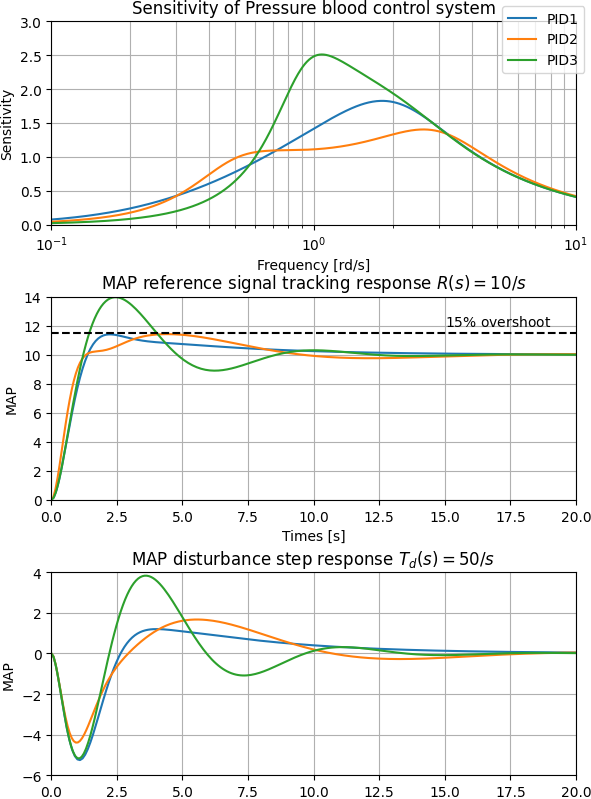

In [1]:
# run-python
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
pid_labs = ['PID1','PID2', 'PID3']
params = [(6,4,1,2),(5,7,2,2),(6,4,4,2)]
R0, D0 = 10, 50
fig = plt.figure(figsize=(6,8))
gs = GridSpec(3,1,figure=fig)
# gs1 = gs[1:,0].subgridspec(2,1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
for ((KP,KD,KI,p), lab) in zip(params,pid_labs):
	S = ct.tf([-2*p,-2*p**2,0,0],[1,2*p,p**2+KD,KP,KI])
	T = ct.tf([KD*R0,KP*R0,KI*R0],[1,2*p,p**2+KD,KP,KI])
	G = ct.tf([-D0,0,0],[1,2*p,p**2+KD,KP,KI])
	mag,_,w = ct.frequency_response(S)
	MAP1 = T.step_response()
	MAP2 = G.step_response()
	ax1.plot(w,mag,label=lab)
	ax2.plot(MAP1.t,MAP1.y.squeeze())
	ax3.plot(MAP2.t,MAP2.y.squeeze())
	ax1.set_xscale('log')
ax2.plot(MAP1.t,11.5*np.ones(MAP1.y.size),'--k')
ax1.set_title("Sensitivity of Pressure blood control system")
ax2.set_title(rf"MAP reference signal tracking response $R(s)={R0}/s$")
ax3.set_title(rf"MAP disturbance step response $T_d(s)={D0}/s$")
ax1.set_xlabel("Frequency [rd/s]")
ax2.set_xlabel("Times [s]")
ax1.set_ylabel("Sensitivity")
ax2.set_ylabel("MAP")
ax3.set_ylabel("MAP")
ax1.set_xlim([0.1,10])
ax3.set_xlim([0.,20])
ax2.set_xlim([0,20])
ax1.set_ylim([0,3])
ax2.set_ylim([0,14])
ax3.set_ylim([-6,4])
ax1.grid(True, which='both')
ax2.grid(True)
ax3.grid(True)
ax2.annotate(r'$15\%$ overshoot',[15,12])
fig.tight_layout()
fig.legend(loc='upper right')
plt.show()

+ **PID Control Gains ans system performance results**

| PID | $K_{P}$ | $K_{D}$ | $K_{I}$ | input response overshoot(%) | Settling time | Disturbance response overshoot(%) |
| :-: | :-----: | :-----: | :-----: | :-------------------------: | :-----------: | :-------------------------------: |
|  1  |   $6$   |   $4$   |   $1$   |           $14.0$            |    $10.9$     |              $5.25$               |
|  2  |   $5$   |   $7$   |   $2$   |           $14.2$            |     $8.7$     |              $4.39$               |
|  3  |   $6$   |   $4$   |   $4$   |           $39.7$            |    $11.1$     |              $5.16$               |

In summary, given the three PID controllers, we would select PID 2 as the controller of choice. It meets all the design specifications while providing a reasonable insensitivity to changes in the plant parameter.